# Numerisk integrasjon
- hva integrasjon er: ta et matematikkfag
- nyttige anvendelser: div. naturfag, ingeniørfag, økonomi, etc.
- her: lære hvordan vi kan integrere numerisk
- hvorfor numerisk heller enn analytisk?
    - noen funksjoner umulig å integrere analytisk (men mulig numerisk)
    - noen ganger kjenner vi ikke funksjonsuttrykket
        - har bare en serie måleresultat eller lignende
        
## Numerisk integrasjon med kjent funksjonsuttrykk

## Eksempel

Har funksjonen $f(x) = x^2 - 2x + 2$

Ønsker å regne ut integralet fra 1 til 4

Dette blir arealet mellom funksjonsgrafen og x-aksen
- dvs. farget areal i figuren
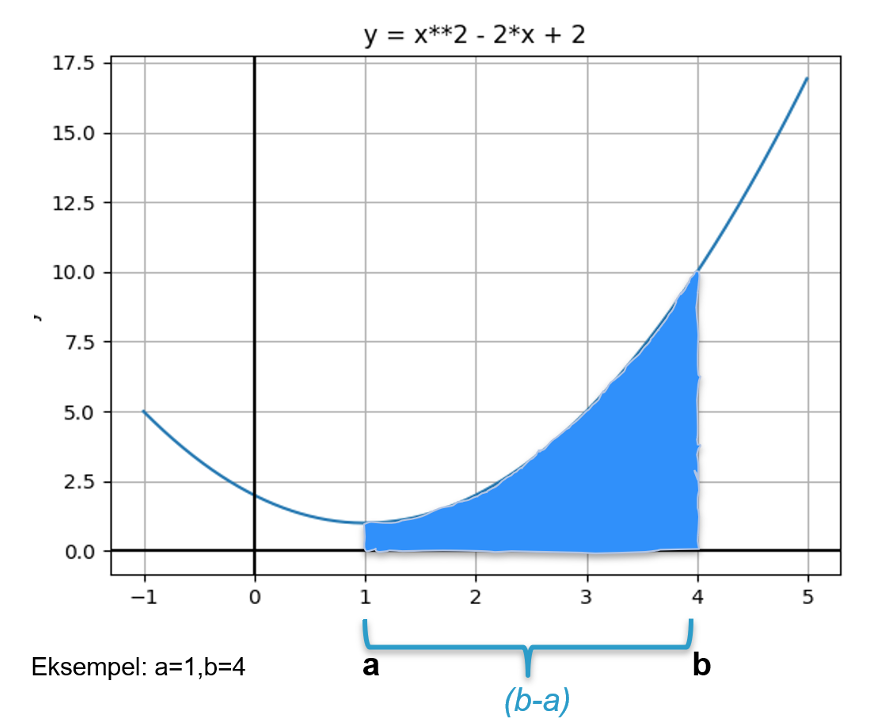

Eksakt areal av det fargede området er vanskelig å regne ut
- fordi grafen har buet kurve

Mye lettere å regne areal av f.eks. rektangel

Eksempel på numerisk integrasjonsmetode: __midtpunktmetoden__
- approksimerer integralet som arealet av n rektangler

Figuren her viser eksemplet n = 1, dvs. kun ett rektangel
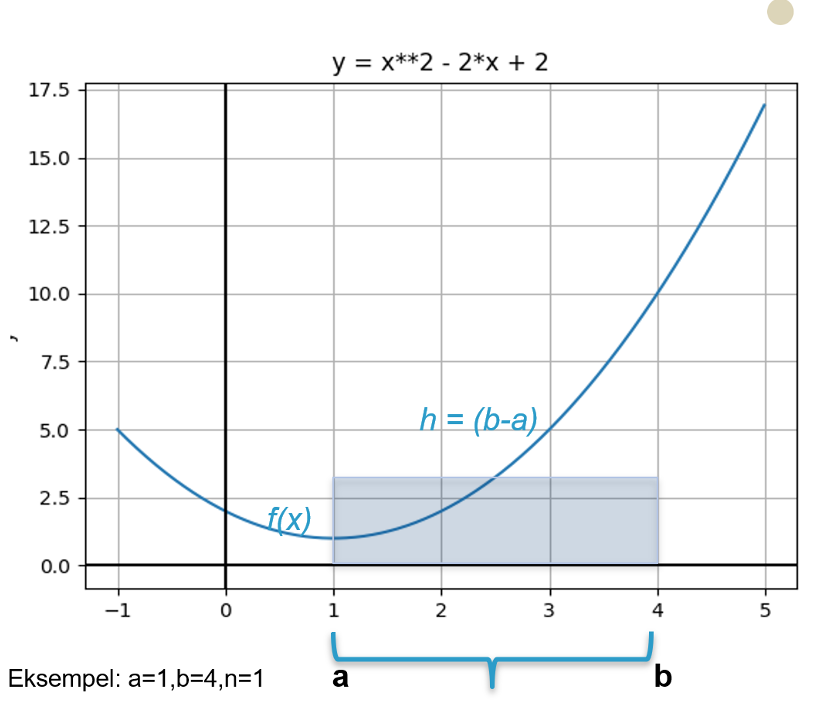
- rektangelet har bredde 3 (4 - 1)
- og høyden (funksjonsverdien i midtpunktet) er f(2.5), altså
    - 2.5\*\*2 - 2\*2.5 + 2 = 3.25
- arealet blir dermed 3 * 3.25 = 9.75

Dette ser vi lett er temmelig unøyaktig
- vi går glipp av et stort areal over høyre halvdel av rektanglet
- dette kompenseres bare delvis av arealet vi tar for mye i venstre halvdel


For å oppnå større nøyaktighet, kan vi bruke flere rektangler

Neste figur viser med 3 rektangler
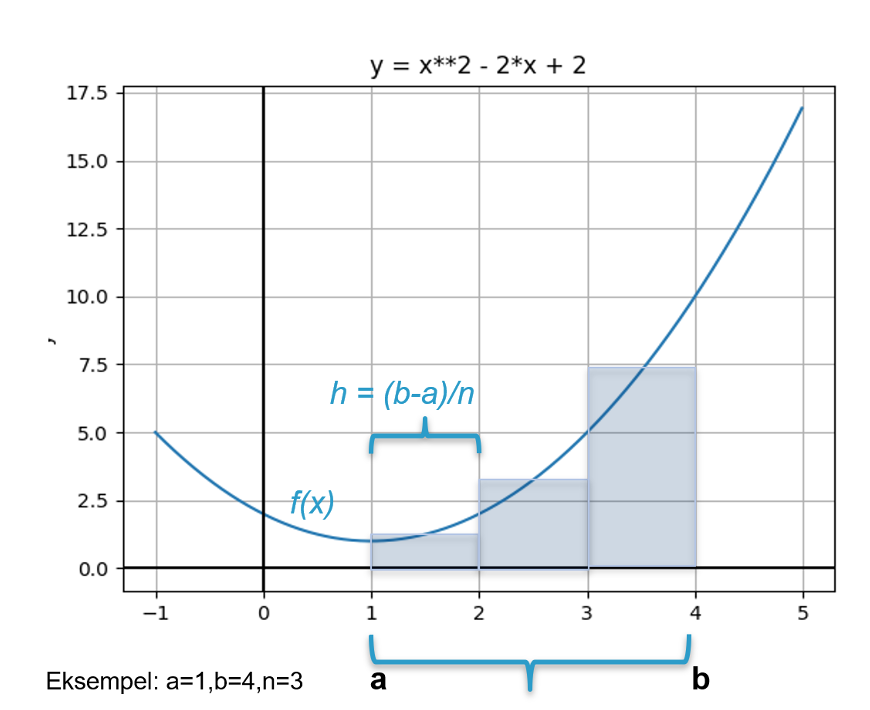

Dette er fortsatt langt fra nøyaktig, men mye bedre enn 1 rektangel
- areal vi tar for mye og for lite ligner mer på hverandre

Generell idé: Lage en funksjon som bruker n rektangler
- hvor __n__ kan gis inn som parameter
- sammen med __f__ -  funksjonen som skal integreres
- og __a,b__ som det skal integreres fra, til

In [2]:
# FØRSTE UTKAST: Lager tre funksjoner vi kan integrere

def f(x):
    return x**2 - 2*x + 2

def g(x):
    return x**3 + x - 1

import numpy as np
def h(x):
    return np.sqrt(np.abs(np.cos(x)))

# Og så selve funksjonen som skal utføre integrasjon:

def midtpunkt_integral_v0(f, a, b, n):
    '''Regner ut numerisk integral av funksjon f ved midtpunktmetoden,
       a, b: området som skal integreres (fra, til)
       n: antall intervaller (rektangler) vi deler opp i'''
    h = (b-a) / n                # bredde rektangel
    m = a + h / 2                # midtpunkt 1. rektangel
    areal = h * f(m)             # areal 1. rektangel
    for i in range(1,n):         # løkke for øvrige rektangler
        m += h                   # m blir neste midtpunkt
        areal += h * f(m)        # legger til areal for rektangel nr i 
    return areal

#prøver integrasjon av 3 funksjoner, n = 1000
print(f"[1,4]∫f(x) = {midtpunkt_integral_v0(f, 1, 4, 1000)}")
print(f"[0,2]∫g(x) = {midtpunkt_integral_v0(g, 0, 2, 1000)}")
print(f"[0,π]∫h(x) = {midtpunkt_integral_v0(h, 0, np.pi, 1000)}")

[1,4]∫f(x) = 11.99999775000003
[0,2]∫g(x) = 3.9999980000000117
[0,π]∫h(x) = 2.3963019126849727


Integrasjonsmetoden ser ut til å fungere greit
- MEN det er noe suboptimalt med den, vil bli forklart snart

Med 1000 intervaller får vi ganske nøyaktige svar, f.eks. skulle:
- første integralet bli 12.0, vi får 11.99999775
- andre bli 4.0, vi får 3.999998

Tilsvarende som for numerisk derivasjon kan det være interessant å spørre hvorvidt vi får mer nøyaktige svar til mindre intervaller vi tar? 

I det følgende går vi i løkke
- ganger n (dvs. antall intervaller) med 10 for hver runde
- printer ut resultatet vi får, hvor korrekt svar skal være 12.0

In [25]:
#prøver integrasjon av f med økende antall intervaller (1, 10, 100, 1000, ...)
print(f'i\t{"n":>15}       \tRESULTAT\t  FEIL')
for i in range(8):
    n = 10**i
    resultat = midtpunkt_integral(f, 1, 4, n)
    print(f'{i}\t{n:15}   \t{resultat:15.12f}\t  {12-resultat:.3e}')

i	              n       	RESULTAT	  FEIL
0	              1   	 9.750000000000	  2.250e+00
1	             10   	11.977500000000	  2.250e-02
2	            100   	11.999775000000	  2.250e-04
3	           1000   	11.999997750000	  2.250e-06
4	          10000   	11.999999977505	  2.250e-08
5	         100000   	11.999999999829	  1.713e-10
6	        1000000   	11.999999999849	  1.510e-10
7	       10000000   	11.999999997187	  2.813e-09


Her ser vi noe lignende som skjedde med numerisk derivasjon
- fra n = 10000000 og oppover blir ikke resultatene mer nøyaktige
- tvert imot får vi litt større feil
    - om enn ikke like dramatisk som med derivasjon
- i tillegg går funksjonen tregere jo flere intervaller

__Hvorfor skjer dette?__
- treghet: lett å forklare
    - jo flere intervaller, jo flere multiplikasjoner og addisjoner
    - å multiplisere INNI løkka, er unødvendig
        - vi multipliserer med h, som har samme verdi i hver runde av løkka
        - kunne i stedet bare ha summert, og så multiplisert med h etter løkka
- økende feil fra $10^7$ og flere intervaller:
    - her kan det ikke være subtraksjon av nesten like tall
        - for i motsetning til derivasjon er det ingen subtraksjon
    - MEN: addisjon av tall av ulik størrelsesorden
        - med mange rektangler blir hvert rektangel lite
        - de siste vi adderer inn, kan gå tapt vs. summen vi har fra før

In [14]:
# NY VERSJON AV KODEN, MER EFFEKTIV
# MULTIPLISERER MED h ETTER LØKKA, I STEDET FOR INNI
# DERMED GJØRES KUN 1 MULTIPLIKASJON, I STEDET FOR f.eks. 1 MILLION

def midtpunkt_integral(f, a, b, n):
    '''Regner ut numerisk integral av funksjon f ved midtpunktmetoden,
       a, b: området som skal integreres (fra, til)
       n: antall intervaller (rektangler) vi deler opp i'''
    h = (b-a) / n                # bredde rektangel
    m = a + h / 2                # midtpunkt 1. rektangel
    sum_f = f(m)                 # initialiserer summen av funksjonsverdier
    for i in range(1,n):         # løkke for øvrige rektangler
        m += h                   # m blir neste midtpunkt
        sum_f += f(m)            # legger til hver nye funksjonsverdi
    return sum_f * h             # ganger hele summen med h ETTER løkka

In [15]:
def f(x):
    return x**2 - 2*x + 2

#prøver integrasjon av f med økende antall intervaller (1, 10, 100, 1000, ...)
print(f'i\t{"n":>15}       \tRESULTAT\t  FEIL')
for i in range(8):
    n = 10**i
    resultat = midtpunkt_integral(f, 1, 4, n)
    print(f'{i}\t{n:15}   \t{resultat:15.12f}\t  {12-resultat:.3e}')

i	              n       	RESULTAT	  FEIL
0	              1   	 9.750000000000	  2.250e+00
1	             10   	11.977500000000	  2.250e-02
2	            100   	11.999775000000	  2.250e-04
3	           1000   	11.999997750000	  2.250e-06
4	          10000   	11.999999977505	  2.250e-08
5	         100000   	11.999999999829	  1.713e-10
6	        1000000   	11.999999999849	  1.510e-10
7	       10000000   	11.999999997187	  2.813e-09


Ved å utføre multiplikasjonen _etter_ løkka heller enn inni, får vi 
- kode som er litt mer effektiv
    - gjør bare 1 multiplikasjon i stedet for f.eks. 1 million multiplikasjoner
    - men antall addisjoner fortsatt som før
Vi har fortsatt samme problem med nøyaktigheten
- øker ned til og med $n=10^6$
- begynner deretter å avta igjen

Dette trenger ikke være noe problem:
- kanskje er den nøyaktigheten vi oppnår for $n=10^6$ helt ok for den anvendelsen vi har?
- jo flere intervall, jo mer tid (og strøm) bruker koden, sånn sett er kanskje også $10^6$ et greit kompromiss mellom nøyaktighet og tid?

Det kan likevel være interessant å vurdere hvorfor avrundingsfeilen begynner å øke igjen, og hva vi kan gjøre med det.

I koden for integrasjon har vi ingen subtraksjon, så problemet kan ikke være subtraksjon av nesten like tall. 

Vi har derimot __addisjon__, så kan tenke at det kan dreie seg om addisjon av tall av svært ulik størrelsesorden
- kodelinja __m+=h__ vil summere m (et tall mellom 1 og 4) med h. Selv om m i og for seg ikke er noe stort tall her, er det likevel en stor forskjell i størrelsesorden etter hvert som h blir veldig liten
- kodelinja __sum_f += f(m)__ vil for små verdier av h plusse sammen et stort antall veldig små rektangler. I starten er dette addering av to små tall, men etter hvert som vi har summert opp de fleste (og f.eks. kommet til 10 av 12), vil det også være en stor forskjell i størrelsesorden mellom tallet vi har hittil og det neste vi summerer.

Begge de to addisjonene kan dermed være med på å forårsake avrundingsfeil.

En annen kilde til avrundingsfeil kan være at selve verdien h ikke lar seg representere eksakt. Vi kunne håpe at rektanglene som vi regner ut areal på, av og til blir litt for store, av og til litt for små, vs. det faktiske arealet vi skal approksimere. Verdien for _h brukes jo imidlertid til å multiplisere opp alle funksjonsverdiene_, så hvis h er unøyaktig, vil dette gi en systematisk feil i retning av for stort eller for lite resultat.

Igjen kan vi derfor tenke, a la for numerisk derivasjon: _Kan vi oppnå en forbedring ved å velge verdier for h som lar seg representere eksakt, dvs. hvor nevneren i brøken er en toerpotens?_ Nedenfor prøver vi nettopp dette, ved å bytte ut 10 med 8 når vi potenserer opp antall intervall vi skal bruke.

In [ ]:
#prøver integrasjon av f hvor antall intervall n er multiplum av 2 (1, 8, 64, 512, ...)
#dette skal i større grad gjøre at (a-b)/n lar seg representere eksakt, 
#kanskje kan dette redusere avrundingsfeil?
print(f'i\t{"n":>15}\tRESULTAT')
for i in range(12):
    n = 8**i
    resultat = midtpunkt_integral(f, 1, 4, n)
    print(f'{i}\t{n:15}   \t{resultat:15.12f}\t  {12-resultat:.3e}')

i	              n	RESULTAT
0	              1   	 9.750000000000	  2.250e+00
1	              8   	11.964843750000	  3.516e-02
2	             64   	11.999450683594	  5.493e-04
3	            512   	11.999991416931	  8.583e-06
4	           4096   	11.999999865890	  1.341e-07
5	          32768   	11.999999997905	  2.095e-09
6	         262144   	11.999999999978	  2.212e-11
7	        2097152   	12.000000000000	  -2.132e-14
8	       16777216   	12.000000000000	  3.908e-14
9	      134217728   	12.000000000000	  1.226e-13
10	     1073741824   	12.000000000001	  -1.080e-12


Vi ser at bruk av n-verdi som er toerpotens faktisk gir vesentlig større nøyaktighet:
- den minste feilen blir nå bare e-14, mens vi hadde e-10 med tierpotenser
- altså er feilen nå bare cirka en titusendel av hva vi hadde før

Fremdeles er det likevel slik at at nøyaktigheten begynner å avta igjen etter hvert som n blir stor:
- feilen blir litt større for i=8 enn i=7, og enda større for i=9


Konklusjon: 
- finn en verdi for n som ikke er for stor (tap av nøyaktighet)
- ta heller en litt mindre verdi for å spare tid og strøm
    - hvis nøyaktigheten likevel er god nok for behovet
- hvis mulig, bruk en n som gjør at (b-a)/n lar seg representere eksakt
    - som typisk vil innebære å velge en n som er toerpotens

## Numerisk integrasjon med ukjent funksjon (f.eks. måledata)
Bruker samme eksempel på måledata som vi hadde i eksemplet numerisk derivasjon

In [ ]:
# Eksempel, vi har noen måledata i arrayet M
# anta at første rad av M er tid, dvs. vi har målt noe hvert 0.1 sek.
# andre rad av M er hva vi målte, f.eks. fart, 0.0, 0.93..., 1.55... osv.
import numpy as np
maalinger = np.array([[0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
        0.5       , 0.6       , 0.7       , 0.8       , 0.9       ,
        1.        , 1.1       , 1.2       , 1.3       , 1.4       ,
        1.5       , 1.6       , 1.7       , 1.8       , 1.9       ,
        2.        , 2.1       , 2.2       , 2.3       , 2.4       ,
        2.5       , 2.6       , 2.7       , 2.8       , 2.9       ,
        3.        ],
       [0.        , 0.93265222, 1.55794558, 1.85943577, 1.95991607,
        1.96171118, 1.92202926, 1.86884143, 1.81510765, 1.76662195,
        1.7258473 , 1.69373523, 1.67059136, 1.65649362, 1.65150034,
        1.65576025, 1.6695787 , 1.69346785, 1.72819658, 1.77485108,
        1.83491599, 1.91038826, 2.0039406 , 2.11916132, 2.26091352,
        2.43588745, 2.6534766 , 2.92722   , 3.27728624, 3.73499307,
        4.35161217]])

I dette tilfellet (uten kjent funksjon, bare gitte data) 
- trenger vi ikke lure på hva slags verdi vi skal bruke for antall intervall (n)
- dette er gitt ved mengden data vi har

Hvis vi bruker midtpunktmetoden, er vi i stand til
- å regne ut n-1 midtpunkt (hvor n er antall data per rad i arrayet)
- bredden til rektangel [i] er gitt ved M[0,i+1] - M[0,i]
- høyden til rektangel i er (M[1,i]+M[1,i+1]) / 2

Får dermed funksjon som gitt nedenfor:

In [ ]:
def midtpunkt_integral_array(M):
    h = M[0,1]-M[0,0] # NB: Dette funker kun hvis verdiene i rad [0] kommer jevnt
    sum_f = 0
    for i in range(len(M[0])-1):
        sum_f += (M[1,i]+M[1,i+1]) / 2
    return h * sum_f

# Prøver det ut på dataene vi hadde
print(midtpunkt_integral_array(maalinger))

For å teste funksjonen på noe hvor vi vet riktig svar, lager vi også et array som inneholder verdier for funksjonen $f(x) = x^2 - 2x + 2$ som vi hadde lenger oppe

In [ ]:
x = np.arange(1,4.01,0.01)
y = x**2 - 2*x + 2
A = np.array((x,y))
print(midtpunkt_integral_array(A))

Som vi ser, får vi et svar ganske nær 12.0 som skulle være det korrekte
- feilen på 0.0005 skyldes nok her at vi har et begrenset antall datapunkter